# Demonstration

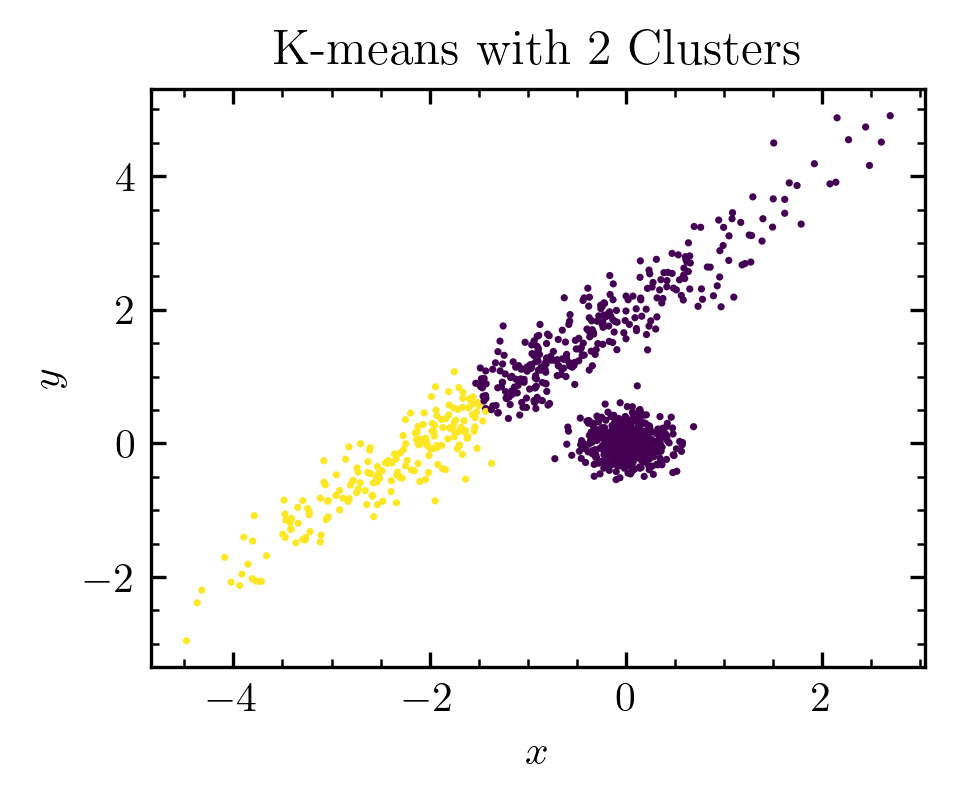

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

np.random.seed(42)
X_1 = np.random.multivariate_normal(
    np.zeros(2), np.eye(2) * 0.05, size=500)
X_2 = np.random.multivariate_normal(
    [-1, 1], [[2, 1.95], [1.95, 2]], size=500)
X = np.vstack([X_1, X_2])

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
c = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=3, c=c, lw=0)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title(f'K-means with {len(kmeans.cluster_centers_)} Clusters');

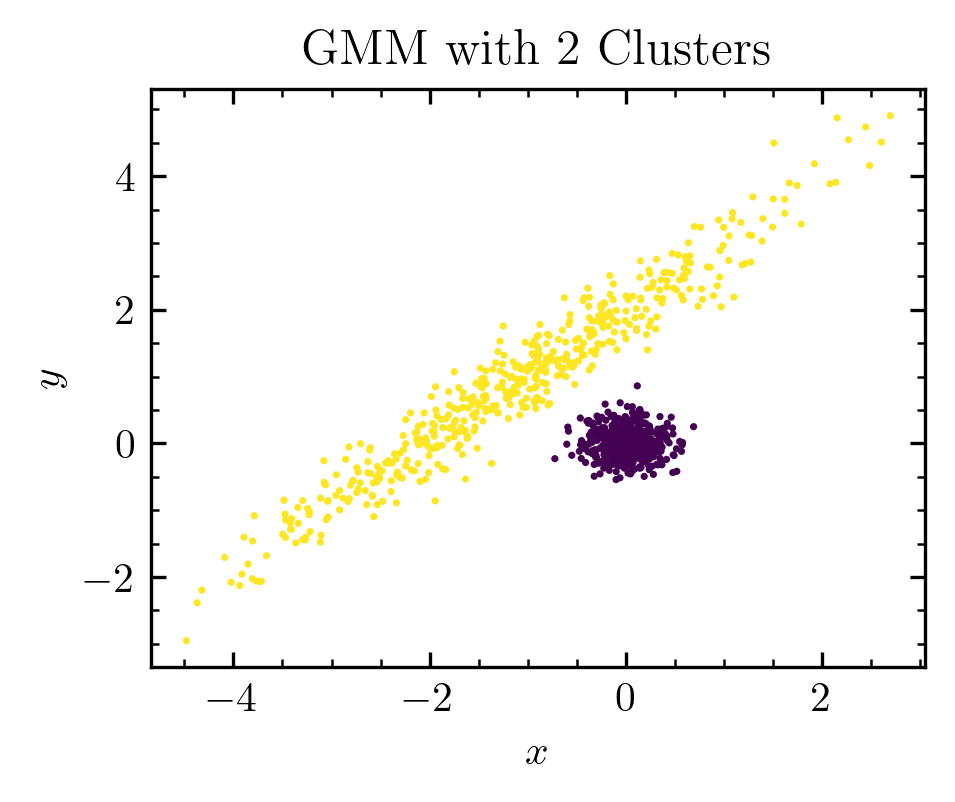

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture

np.random.seed(42)
X_1 = np.random.multivariate_normal(
    np.zeros(2), np.eye(2) * 0.05, size=500)
X_2 = np.random.multivariate_normal(
    [-1, 1], [[2, 1.95], [1.95, 2]], size=500)
X = np.vstack([X_1, X_2])

gmm = GaussianMixture(n_components=2, random_state=42).fit(X)
c = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=3, c=c, lw=0)
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.title(f'GMM with {len(gmm.weights_)} Clusters');

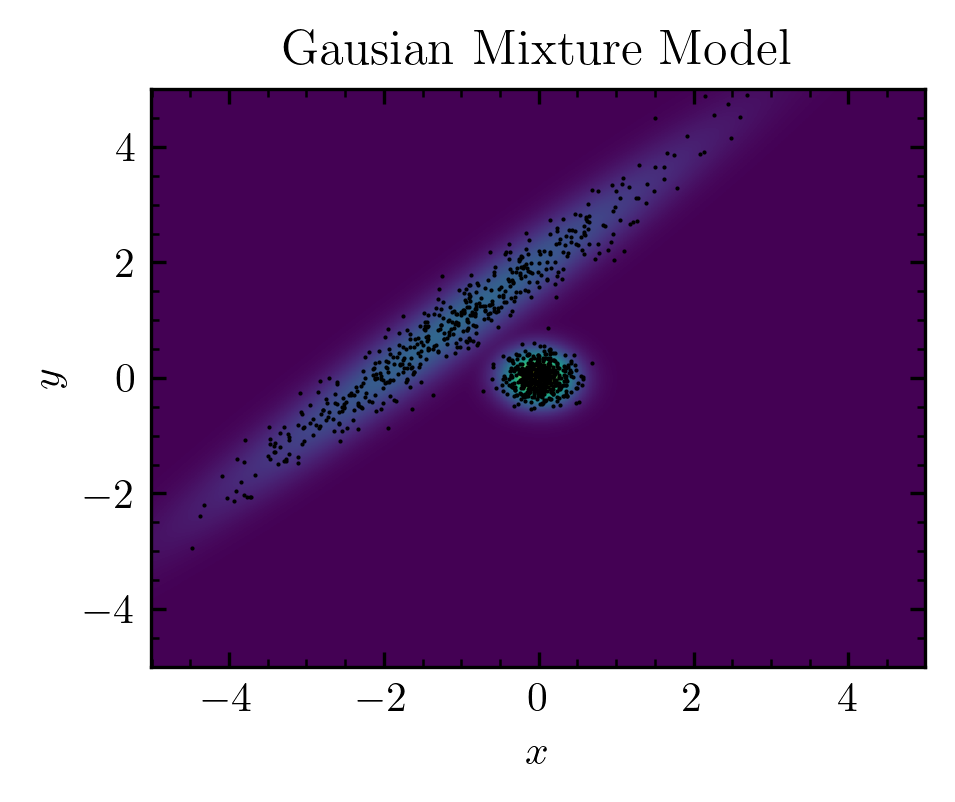

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture

np.random.seed(42)
X_1 = np.random.multivariate_normal(
    np.zeros(2), np.eye(2) * 0.05, size=500)
X_2 = np.random.multivariate_normal(
    [-1, 1], [[2, 1.95], [1.95, 2]], size=500)
X = np.vstack([X_1, X_2])
plt.scatter(X[:, 0], X[:, 1], s=1, lw=0, c='black')

gmm = GaussianMixture(n_components=2, random_state=42).fit(X)

x, y = np.mgrid[-5:5:.01, -5:5:.01]
X = np.column_stack([x.ravel(), y.ravel()])

plt.pcolormesh(x, y, np.exp(gmm.score_samples(X).reshape(x.shape))**0.5,
               zorder=-1, cmap='viridis')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Gausian Mixture Model');

(-1.5, 1.5)

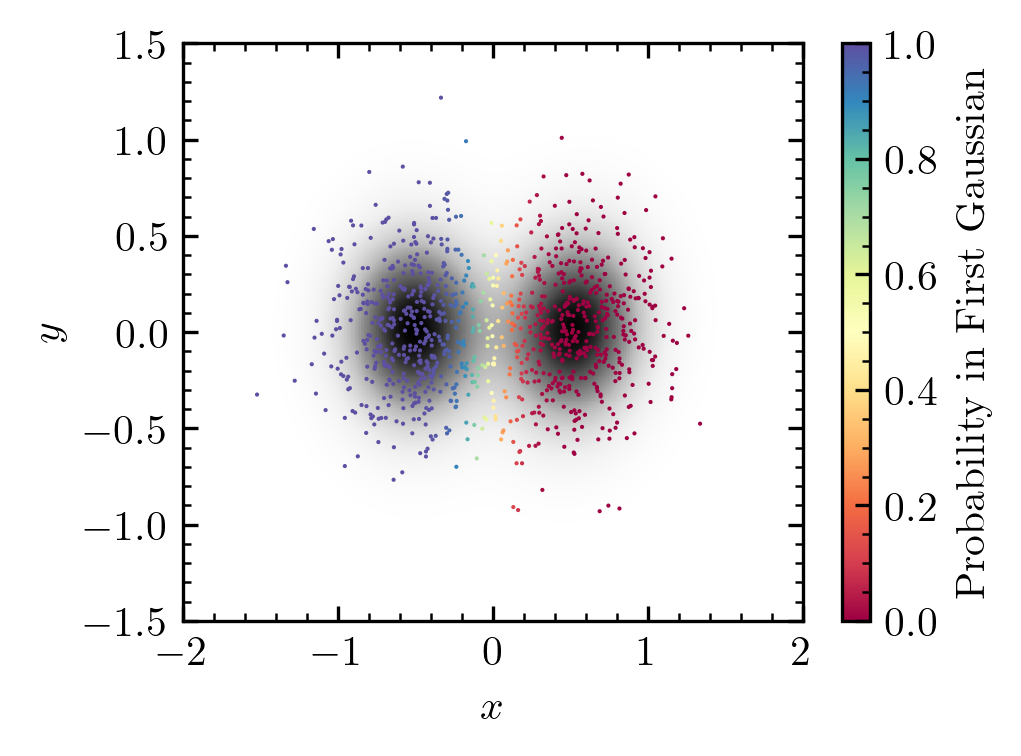

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture

np.random.seed(42)
X_1 = np.random.multivariate_normal(
    [-0.5, 0], np.eye(2) * 0.1, size=500)
X_2 = np.random.multivariate_normal(
    [+0.5, 0], np.eye(2) * 0.1, size=500)
X = np.vstack([X_1, X_2])

gmm = GaussianMixture(n_components=2, random_state=42).fit(X)
p = gmm.predict_proba(X)
plt.scatter(X[:, 0], X[:, 1], s=1, lw=0, c=p[:, 0], cmap='Spectral', vmin=0,
            vmax=1)
cb = plt.colorbar(label='Probability in First Gaussian')

x, y = np.mgrid[-2:2:.01, -1.5:1.5:.01]
X = np.column_stack([x.ravel(), y.ravel()])

plt.pcolormesh(x, y, np.exp(gmm.score_samples(X).reshape(x.shape)),
               zorder=-1, cmap='Greys')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-2, +2)
plt.ylim(-1.5, +1.5)

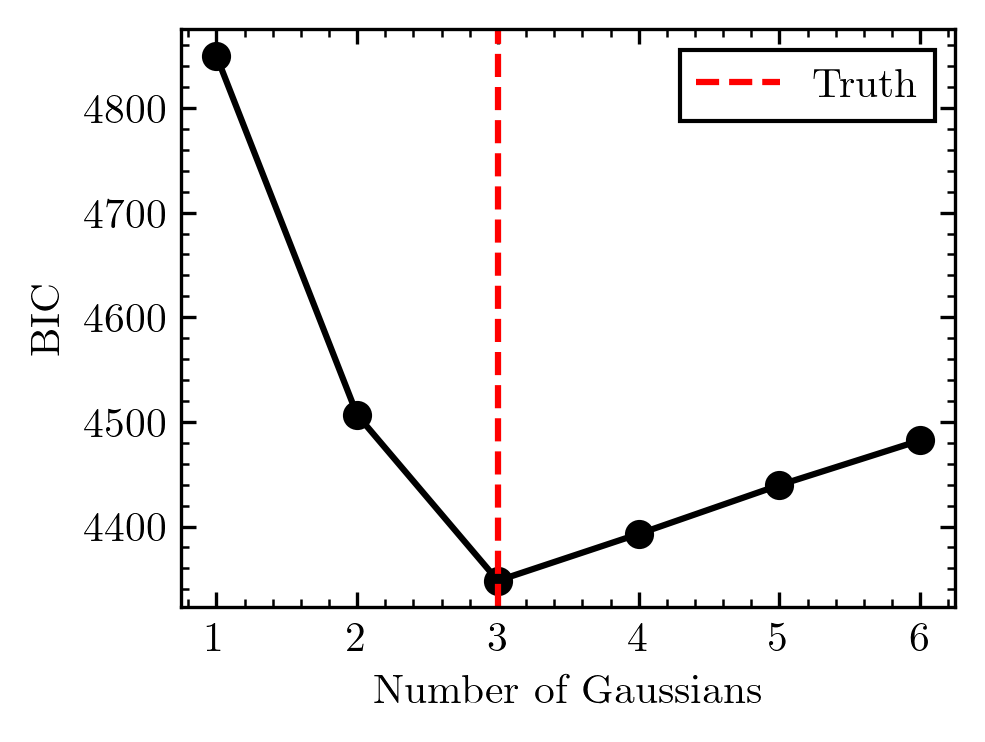

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GaussianMixture

np.random.seed(42)
X_1 = np.random.multivariate_normal(
    [-0.5, 0], np.eye(2) * 0.1, size=500)
X_2 = np.random.multivariate_normal(
    [+0.5, 0], np.eye(2) * 0.1, size=500)
X_3 = np.random.multivariate_normal(
    [0, 1], np.eye(2) * 0.1, size=500)
X = np.vstack([X_1, X_2, X_3])

n_components = list(range(1, 7))
bic = []
for n_c in n_components:
    gmm = GaussianMixture(n_components=n_c, random_state=42).fit(X)
    bic.append(gmm.bic(X))

plt.plot(n_components, bic, marker='o', color='black')
plt.xlabel(r'Number of Gaussians')
plt.ylabel(r'BIC')
plt.axvline(3, label=r'Truth', ls='--', color='red')
plt.legend(loc='best');

# Exercise

![iris](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/330px-Iris_versicolor_3.jpg)

In this exercise, we'll work with the well-known [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) first used in a publication in 1936. It consists of 4 features, sepal length, sepal width, petal length, and petal width, for $150$ flowers of the iris family. The data set is provided as part of `sklearn`, as shown below.

(a) To visualize the data, we can choose two of the four features and make scatter plots. Please produce scatter plots for all six possible combinations of two features. How many clusters do you think there are? (Hint `itertools.combinations(range(4), 2)` will give you all six possible combinations of two numbers drawn from $[0, 1, 2, 3]$.)

(b) Next, we will select an appropriate number of Gaussians for our GMM. To this end, compute GMMs with $1$ to $10$ Gaussians and calculate their respective Bayesian information criteria (BIC). What number of Gaussians is preferred by the data, i.e., which model yields the lowest BIC?

(c) Visualize your optimal GMM from part (b) using the scatter plots from part (a). Color code each flower according to its most likely Gaussian association.

(d) The iris flower data set actually consists of flowers from three distinct species: *Iris setosa*, *Iris versicolour*, and *Iris virginica*. The species are encoded as integers (0=setosa, 1=versicolour, 2=virginica) in the $y$-value of `load_iris(return_X_y=True)`. Thus, regardless of what you found in part (b), compute a GMM with three Gaussians. Let's visualize the membership probabilities using a [ternary plot](https://en.wikipedia.org/wiki/Ternary_plot), the code for which is provided below. When visualizing the three membership probabilities for each flower, the closer a point is to one of the three vertices, the more strongly it is associated with that Gaussian. Do the three flower species tend to correspond to different Gaussians?

(e) The numbering returned by a GMM is arbitrary. In other words, there is no special meaning assigned to the first Gaussian compared to the second (unlike in PCA, for example). For each of the three distinct target $y$ values, compute the maximum mean membership probability across the three Gaussians. Then average these probabilities for the three flower species. This score measures how well the GMM predictions align with the actual taxonomy. What score do you obtain?

(f) Compare your answer from part (e) to the prediction of K-means. Since K-means only provides hard clustering, simply assume 100% membership probability for each assignment. How does the score compare to your answer in part (e)?

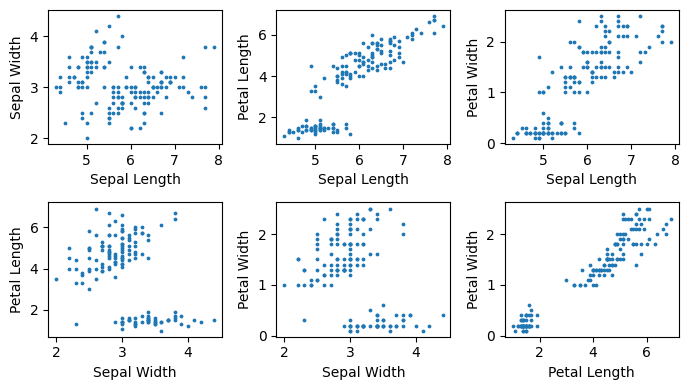

In [48]:
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
keys = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

fig, axs = plt.subplots(figsize=(7, 4), ncols=3, nrows=2)
axs = axs.flatten()
for ax, (i_1, i_2) in zip(axs, itertools.combinations(range(4), 2)):
    ax.scatter(X[:, i_1], X[:, i_2], s=3)
    ax.set_xlabel(keys[i_1])
    ax.set_ylabel(keys[i_2])
plt.tight_layout()
plt.show()

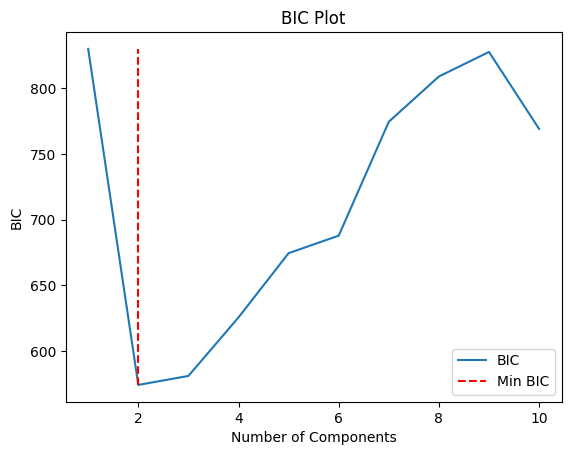

In [47]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
keys = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

bic = []
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters).fit(X)
    bic.append(gmm.bic(X))
plt.plot(range(1, 11), bic, label='BIC')
plt.title('BIC Plot')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.vlines(2, min(bic), max(bic), ls='--', color='red', label = 'Min BIC')
plt.legend()
plt.show()

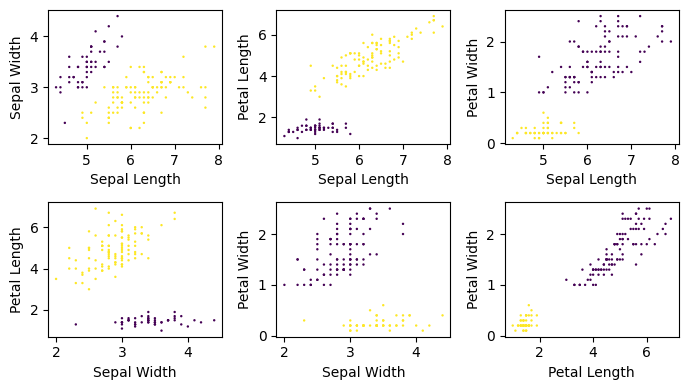

In [46]:
import itertools
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)
keys = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

fig, axs = plt.subplots(figsize=(7, 4), ncols=3, nrows=2)
axs = axs.flatten()
for ax, (i_1, i_2) in zip(axs, itertools.combinations(range(4), 2)):
    gmm = GaussianMixture(n_components=2).fit(X)
    c = gmm.predict(X)
    ax.scatter(X[:, i_1], X[:, i_2], s=3, c=c, lw=0)
    ax.set_xlabel(keys[i_1])
    ax.set_ylabel(keys[i_2])
plt.tight_layout()
plt.show()

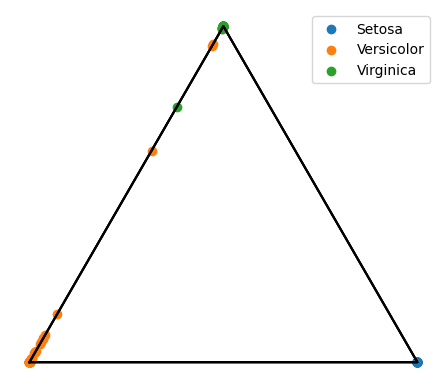

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

X, y = datasets.load_iris(return_X_y=True)
keys = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

def ternary_plot(abc, label=None):
    """
    Make a ternary scatter plot.

    Note, if you call this function repeatedly, the scatter points will have
    different colors.

    Parameters
    ----------
    abc : numpy.ndarray of shape (n_samples, 3)
        Data to plot.
    label : str or None, optional
        Label to be used in a legend. Default is None.
    """
    a, b, c = abc.T
    x = 0.5 * (2 * b + c) / (a + b + c)
    y = np.sqrt(3) / 2 * c / (a + b + c)
    plt.plot([0, 1, 1 / 2, 0], [0, 0, np.sqrt(3) / 2, 0], color='black')
    plt.axis('off')
    plt.scatter(x, y, label=label)
    if label is not None:
        plt.legend(loc='best')
    plt.gca().set_aspect('equal')

setosa = X[y == 0]
versicolor = X[y == 1]
virginica = X[y == 2]
gmm = GaussianMixture(n_components=3).fit(X)
setosa_gauss = gmm.predict_proba(setosa)
versicolor_gauss = gmm.predict_proba(versicolor)
virginica_gauss = gmm.predict_proba(virginica)
ternary_plot(setosa_gauss, label='Setosa')
ternary_plot(versicolor_gauss, label='Versicolor')
ternary_plot(virginica_gauss, label='Virginica')


In [63]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

X, y = datasets.load_iris(return_X_y=True)
keys = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

setosa = X[y == 0]
versicolor = X[y == 1]
virginica = X[y == 2]
gmm = GaussianMixture(n_components=3).fit(X)
setosa_gauss = gmm.predict_proba(setosa)
versicolor_gauss = gmm.predict_proba(versicolor)
virginica_gauss = gmm.predict_proba(virginica)
print(f"Setosa: {np.mean(setosa_gauss, axis=0)}")
print(f"Versicolor: {np.mean(versicolor_gauss, axis=0)}")
print(f"Virginica: {np.mean(virginica_gauss, axis=0)}")


Setosa: [1.00000000e+00 1.52605930e-16 2.29171069e-21]
Versicolor: [6.61191825e-30 8.95652103e-01 1.04347897e-01]
Virginica: [6.57445702e-97 5.48758319e-03 9.94512417e-01]
